In [1]:
import numpy as np
from numpy import cov,corrcoef
import matplotlib.pyplot as plt
import astropy.units as u

In [98]:
agn=np.loadtxt('Downloads/allagn0608.txt')#all agn data
xrb=np.loadtxt('Downloads/allxrb0609.txt')#all xrb data
agnandxrb=np.loadtxt('Downloads/all0608.txt')#all data
agnminusradio=np.loadtxt('Downloads/agnminusradio0609.txt')#all agns exclude the radio agns
allradioloud=np.loadtxt('Downloads/allradio0611.txt')#all radio
fri=np.loadtxt('Downloads/frI.txt')#all fri
onlyradioloud=np.loadtxt('Downloads/radioloud.txt')#radio loud only
youngradiosource=np.loadtxt('Downloads/youngrs.txt')#young radio source
dong14=np.loadtxt('Downloads/dong14.txt')

In [3]:
agn.shape,xrb.shape,agnandxrb.shape,agnminusradio.shape

((346, 6), (137, 6), (483, 6), (288, 6))

In [4]:
ledd=np.log10(1.3)+38#Eddington luminosity of Solar Mass

In [5]:
ledd

38.113943352306833

In [6]:
#data for agns and xrb
raax=agnandxrb[:,0]
xaax=agnandxrb[:,1]
maax=agnandxrb[:,2]
raaxedd=raax-ledd-maax
xaaxedd=xaax-ledd-maax


In [7]:
#data for agn minus radio
ramr=agnminusradio[:,0]
xamr=agnminusradio[:,1]
mamr=agnminusradio[:,2]
ramredd=ramr-ledd-mamr
xamredd=xamr-ledd-mamr

In [99]:
#for radio agn
rarl=allradioloud[:,2]
xarl=allradioloud[:,1]
marl=allradioloud[:,0]
rarledd=rarl-ledd-marl
xarledd=xarl-ledd-marl

In [8]:
#data for agn
r=agn[:,0]
x=agn[:,1]
m=agn[:,2]
redd=r-ledd-m
xedd=x-ledd-m

In [9]:
#for x-ray binary
rxrb=xrb[:,0]
xxrb=xrb[:,1]
mxrb=xrb[:,2]
rxrbedd=rxrb-ledd-mxrb
xxrbedd=xxrb-ledd-mxrb

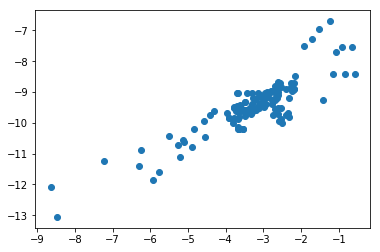

In [10]:
plt.scatter(xxrbedd,rxrbedd)
plt.show()

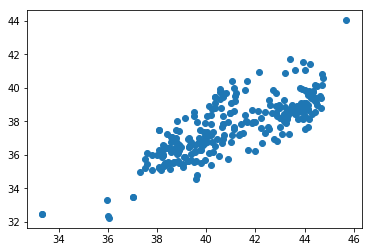

In [11]:
#xamr,ramr
plt.scatter(xamr,ramr)
plt.show()

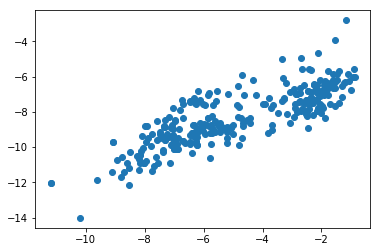

In [12]:
plt.scatter(xamredd,ramredd)
plt.show()

In [13]:
fit=np.polyfit(xamr,ramr,1)
print(fit)
np.corrcoef(xamr,ramr)

[  0.59059788  13.38267778]


array([[ 1.        ,  0.79700685],
       [ 0.79700685,  1.        ]])

In [14]:
#x,r

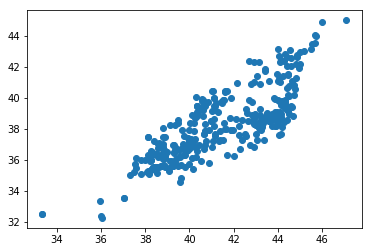

In [15]:
plt.scatter(x,r)
plt.show()

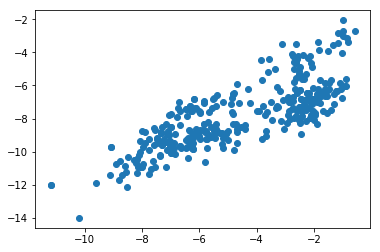

In [16]:
plt.scatter(xedd,redd)
plt.show()

In [17]:
fit=np.polyfit(xedd,redd,1)
print(fit)
np.corrcoef(xedd,redd)

[ 0.65229358 -4.79602901]


array([[ 1.        ,  0.79864221],
       [ 0.79864221,  1.        ]])

In [102]:
#fix the M in a bin
#consider R-X
def fixmass(binrange,radio,xray,mass):
    binsize=0.5
    judge=(abs(mass-binrange)<binsize)
    rnew=radio[judge]
    xnew=xray[judge]
    size=rnew.size
    if size > 15 :
        fit=np.polyfit(xnew,rnew,1)
        R2=np.corrcoef(xnew,rnew)
        if R2[0,1]>0.6:
        #print('num in range is  ',xnew.size) 
            print(size,binrange,fit[0],R2[0,1])
            #plt.scatter(xnew,rnew)
    plt.show()
            #return fit[0]   

In [101]:
#fix the x-ray Eddington rate
#consider R-M
def fixaccretionrate(binrange,radio,mass,xedd):
    binsize=0.5
    judge=(abs(xedd-binrange)<binsize)
    rnew=radio[judge]
    mnew=mass[judge]
    size=rnew.size
    if size > 15 :
        fit=np.polyfit(mnew,rnew,1)
        R2=np.corrcoef(mnew,rnew)
        if R2[0,1]>0.6:
        #print('num in range is  ',xnew.size) 
            print(size,binrange,fit[0],R2[0,1])
            #return fit[0]

In [89]:
#fix the xray luminosity
#consider R-M
def fixxray(binrange,radio,xray,mass):
    binsize=0.15
    judge=(abs(xray-binrange)<binsize)
    rnew=radio[judge]
    mnew=mass[judge]
    size=rnew.size
    if size > 15 :
        fit=np.polyfit(mnew,rnew,1)
        R2=np.corrcoef(mnew,rnew)
        if R2[0,1]>0.6: 
            print(size,binrange,fit[0],R2[0,1])
            #return binrange,fit[0]

In [103]:
#fix mass for all radio loud
print('num,mass_range, R_X_coeff,   R2')
for i in np.arange(5,10,0.3):
    fixmass(i,rarl,xarl,marl)

num,mass_range, R_X_coeff,   R2
25 8.3 0.904136951775 0.930349820528
39 8.6 0.851427467695 0.907632160146
41 8.9 0.80459236982 0.886133049376
32 9.2 0.758314936544 0.89233823414


In [96]:
#fix mass for all agn
print('num,mass_range, R_X_coeff,   R2')
for i in np.arange(5,10,0.3):
    fixmass(i,r,x,m)



num,mass_range, R_X_coeff,   R2
20 6.8 0.598454818153 0.793021365155
22 7.1 0.576376699213 0.892680222338
30 7.4 0.892139923743 0.865687858886
45 7.7 0.682616963114 0.837966516116
49 8.0 0.639333117501 0.821060549215
46 8.3 0.681435229781 0.868922338135
46 8.6 0.723280074248 0.734318375882
39 8.9 0.763167506628 0.825589521531
19 9.2 0.640449460077 0.858811540619


In [93]:
#fix mass for all agn minus radio
print('num,mass_range, R_X_coeff,   R2')
for i in np.arange(5,10,0.3):
    fixmass(i,ramr,xamr,mamr)

num,mass_range, R_X_coeff,   R2
20 6.8 0.598454818153 0.793021365155
22 7.1 0.576376699213 0.892680222338
26 7.4 0.734600104598 0.896105219906
44 7.7 0.645569706461 0.87046350053
44 8.0 0.53095906383 0.873998786724
41 8.3 0.556402630329 0.89104781369
31 8.6 0.515339729138 0.679176073855
22 8.9 0.521674267282 0.697035841557


In [95]:
#fix mass for all xrb
print('num,mass_range, R_X_coeff,   R2')
for i in np.arange(0.8,1.5,0.2):
    fixmass(i,rxrb,xxrb,mxrb) 

num,mass_range, R_X_coeff,   R2
18 0.8 0.487749158194 0.906634553385
127 1.0 0.662611399293 0.867747194973
88 1.2 0.517346807268 0.882502498019


In [39]:
#all agn
#fix xray accretion rate
print('num,accretion_range,   R_M_coeff,   R2')
for i in np.arange(-10,0,0.1):
    fixaccretionrate(i,r,m,xedd)

num,accretion_range,   R_M_coeff,   R2
16 -8.3 1.46655239728 0.92812179833
17 -8.2 1.52037341733 0.660149639724
17 -8.1 1.53454634866 0.636406927383
19 -7.8 1.60378802811 0.680363413274
17 -7.7 1.40421629189 0.656414472374
24 -7.4 1.16400156455 0.613962074762
34 -7.3 1.50685315107 0.820613037205
36 -7.2 1.55896156064 0.854509465571
37 -7.1 1.46622432887 0.829361339776
33 -7.0 1.76137161432 0.872364591753
35 -6.9 1.79328265139 0.887723314627
30 -6.8 1.8568537609 0.91570371379
26 -6.7 2.00381871747 0.901636379366
30 -6.6 1.76764123222 0.840332984747
37 -6.5 1.68100983804 0.901722817558
40 -6.4 1.71289409104 0.893891809533
38 -6.3 1.68568491983 0.883979113679
42 -6.2 1.70892557569 0.891728320722
41 -6.1 1.7272637425 0.900657220472
37 -6.0 1.85359186006 0.920635603977
30 -5.9 2.39540728061 0.92926255415
26 -5.8 2.2097197284 0.892286120347
30 -5.7 1.99260060619 0.889393067453
28 -5.6 2.06064310525 0.879613039613
24 -5.5 1.89305204387 0.873727451818
21 -5.4 1.74732781029 0.856205349929
21 -5

In [25]:
#for agn minus radio
#fix xray accretion rate
print('num,accretion_range,   R_M_coeff,   R2')
for i in np.arange(-10,0,0.1):
    fixaccretionrate(i,ramr,mamr,xamredd) 

num,accretion_range,   R_M_coeff,   R2
16 -8.3 1.46655239728 0.92812179833
17 -8.2 1.52037341733 0.660149639724
17 -8.1 1.53454634866 0.636406927383
18 -7.8 1.472703978 0.649620250914
16 -7.7 1.28091485189 0.615522396265
32 -7.3 1.36025189906 0.769856576806
35 -7.2 1.46169095597 0.827850654593
36 -7.1 1.359088012 0.800585540733
31 -7.0 1.62416447337 0.864833156749
33 -6.9 1.69028442777 0.881936522872
28 -6.8 1.75796294182 0.914821066716
24 -6.7 1.91009528789 0.90454370823
25 -6.6 1.67747624196 0.85572955662
31 -6.5 1.58744449365 0.910117587172
34 -6.4 1.63530909191 0.897559557927
32 -6.3 1.60681170059 0.889131479037
35 -6.2 1.62893410224 0.89453028254
34 -6.1 1.65586158357 0.907459167478
33 -6.0 1.76200074301 0.914258593991
27 -5.9 2.34215265754 0.923834809997
24 -5.8 2.16933568474 0.882235716043
25 -5.7 1.85047390702 0.868567844272
23 -5.6 1.82719709132 0.852829574199
20 -5.5 1.61657604386 0.852957731324
17 -5.4 1.48081682852 0.82019876017
17 -5.3 1.47332597522 0.824769877272
17 -5.0 

In [26]:
#for all agn and xrb
#fix xray accretion rate
print('num,accretion_range,   R_M_coeff,   R2')
for i in np.arange(-10,0,0.1):
    fixaccretionrate(i,raax,maax,xaaxedd) 

num,accretion_range,   R_M_coeff,   R2
17 -8.3 1.34458203436 0.983901518007
18 -8.2 1.37105325354 0.964777433283
17 -8.1 1.53454634866 0.636406927383
19 -7.8 1.60378802811 0.680363413274
17 -7.7 1.40421629189 0.656414472374
23 -7.5 1.20215723257 0.914896130764
25 -7.4 1.23633953503 0.920553505435
35 -7.3 1.32185122131 0.936874022505
37 -7.2 1.33686335763 0.942265779309
38 -7.1 1.31347346474 0.93523645255
34 -7.0 1.40453880425 0.932786221835
35 -6.9 1.79328265139 0.887723314627
30 -6.8 1.8568537609 0.91570371379
26 -6.7 2.00381871747 0.901636379366
31 -6.6 1.4593027248 0.928410418167
39 -6.5 1.43797078029 0.954113775354
42 -6.4 1.44469581273 0.950435789322
40 -6.3 1.43435880755 0.950906846725
45 -6.2 1.4496885193 0.963640193226
44 -6.1 1.47054246877 0.968316461853
40 -6.0 1.48905503393 0.970321209269
32 -5.9 1.53291330788 0.971542046281
29 -5.8 1.44895036568 0.973858193825
33 -5.7 1.46254080814 0.972341206249
30 -5.6 1.45616760438 0.958180290191
28 -5.5 1.38249480267 0.97552135672
26 -5

In [27]:
#for all xrb
#fix xray accretion rate
print('num,accretion_range,   R_M_coeff,   R2')
for i in np.arange(-10,0,0.1):
    fixaccretionrate(i,rxrb,mxrb,xxrbedd)

num,accretion_range,   R_M_coeff,   R2


In [28]:
#all agn
#fix xray luminosity
print('num,xray_range,R_M_coeff,   R2')
for i in np.arange(33,45,0.1):
    fixxray(i,r,x,m) 
        


num,xray_range,R_M_coeff,   R2
24 39.3 0.618170085092 0.653948625832
25 39.4 0.734640369766 0.748616552992
28 39.5 0.654772136087 0.70828329535
25 39.6 0.636543334017 0.708441109038
28 39.7 0.651540948751 0.719610068664
31 39.8 0.674047891232 0.694593803046
32 39.9 0.815157218352 0.623897353385
32 40.0 0.82002402423 0.669414463674
35 40.1 1.33410954598 0.74799760186
33 40.2 1.31527940914 0.745322479908
32 40.3 1.65515085048 0.836480401504
37 40.4 1.41057386828 0.765138388533
32 40.5 1.35761560285 0.714120643607
31 40.6 1.35734336981 0.73462084795
27 40.7 1.09656162537 0.656889759342
31 40.8 1.22518722917 0.676999126804
32 40.9 1.25852894091 0.687417957131
22 41.0 1.46734069046 0.746091936651
24 41.1 1.12237752935 0.73100305607
24 41.2 0.945301554196 0.732635716536
24 41.3 1.00442086424 0.741191282037
24 41.4 0.976252567263 0.691081658037
16 41.5 0.93618073787 0.657930298615
19 41.6 0.863724074742 0.613769193767
18 41.7 1.00900743487 0.666285558962
16 41.8 1.1243057166 0.654158595583
21

In [29]:
#agn minus radio
#fix xray luminosity
print('num,xray_range, R_M_coeff,   R2')
for i in np.arange(30,48,0.1):
    fixxray(i,ramr,xamr,mamr)

num,xray_range, R_M_coeff,   R2
23 39.3 0.571702971608 0.638136754494
24 39.4 0.698229771338 0.738546069857
27 39.5 0.615589344066 0.693042203097
24 39.6 0.597734043045 0.692510554453
28 39.7 0.651540948751 0.719610068664
31 39.8 0.674047891232 0.694593803046
32 39.9 0.815157218352 0.623897353385
32 40.0 0.82002402423 0.669414463674
32 40.1 1.16203543607 0.732344366997
30 40.2 1.147349483 0.730616361003
27 40.3 1.57320970139 0.81073662361
30 40.4 1.37363398374 0.759833923067
25 40.5 1.31177118416 0.711755529199
24 40.6 1.33398433087 0.742105741124
23 40.7 1.08155414936 0.643246638831
24 40.8 1.14992414457 0.656386770177
26 40.9 1.19009944984 0.687692870175
17 41.0 1.3868313965 0.736332903584
19 41.1 1.02717622635 0.709378578248
17 41.2 0.837439932251 0.719373482904
17 41.4 0.865339343951 0.702615875614
17 42.7 0.838415977806 0.708498548801
19 42.8 0.794725620005 0.614552812852


In [30]:
#agn and xrb
#fix xray luminosity
print('num,xray_range, R_M_coeff,   R2')
for i in np.arange(30,48,0.1):
    fixxray(i,raax,xaax,maax)

num,xray_range, R_M_coeff,   R2
36 35.7 0.612545156292 0.903752166794
31 35.8 0.48554088734 0.921744855676
35 35.9 0.465467188998 0.939914505597
38 36.0 0.45912194457 0.93245714578
41 36.1 0.451390551901 0.925810476654
42 36.2 0.442647753249 0.922566147124
44 36.3 0.335293247361 0.791536027022
29 36.8 0.86397094143 0.896885059865
22 36.9 0.821026626084 0.876541216176
23 38.0 0.604060274079 0.906619648511
27 38.1 0.607244660841 0.909978755
30 38.2 0.670588491659 0.923558013036
35 38.3 0.675814221869 0.903336805022
35 38.4 0.659791165559 0.918794412923
37 38.5 0.695177403835 0.930880823955
34 38.6 0.72569887143 0.929656443849
33 38.7 0.763865324119 0.938223656682
31 38.8 0.716717159406 0.886259859562
27 38.9 0.746358983111 0.908835134992
28 39.0 0.80780543087 0.868349079361
24 39.3 0.618170085092 0.653948625832
25 39.4 0.734640369766 0.748616552992
28 39.5 0.654772136087 0.70828329535
25 39.6 0.636543334017 0.708441109038
28 39.7 0.651540948751 0.719610068664
31 39.8 0.674047891232 0.694

In [31]:
#xrb
#fix xray luminosity
print('num,xray_range, R_M_coeff,   R2')
for i in np.arange(30,48,0.1):
    fixxray(i,rxrb,xxrb,mxrb)

num,xray_range, R_M_coeff,   R2


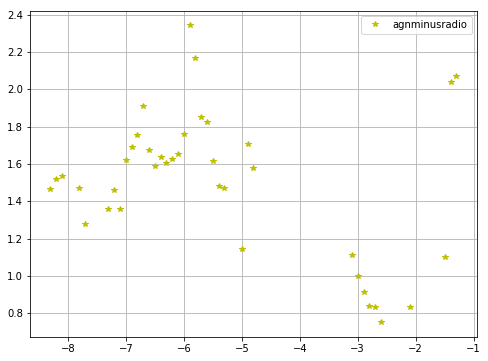

In [77]:
agnxrbcoeff=np.loadtxt('Downloads/agnxrb.txt')
agncoeff=np.loadtxt('Downloads/agn.txt')
agnminusradiocoeff=np.loadtxt('Downloads/agnminusradio.txt')
plt.figure(figsize=(8,6))
#plt.plot(agncoeff[:,1],agncoeff[:,2],'r+',label='agn')
#plt.plot(agnxrbcoeff[:,1],agnxrbcoeff[:,2],'b.',label='agnandxrb')
plt.plot(agnminusradiocoeff[:,1],agnminusradiocoeff[:,2],'y*',label='agnminusradio')
plt.legend()
plt.grid()
plt.show()